In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/frankwoods/Desktop/lassie/plotting.py'>

# Load in all depth vs resistance curves into a dataframe list

In [2]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))
data_features_df = pd.read_csv("data/features.csv")
non_features_list = ['filenames', 'feifeis_ylabels', 'liams_ylabels', 'marions_ylabels', 'distances']
clustering_features_df = data_features_df.drop(non_features_list, axis=1)

# Correlation Matrix

In [3]:
print(clustering_features_df.corr())

                              overall_slope  max_depth  max_resistance  \
overall_slope                      1.000000  -0.951302        0.930178   
max_depth                         -0.951302   1.000000       -0.858433   
max_resistance                     0.930178  -0.858433        1.000000   
num_peaks                         -0.589106   0.591340       -0.568061   
largest_force_drop                -0.350411   0.387122       -0.260562   
curve_shape                        0.002262   0.060331        0.039995   
largest_force_drop_res_level      -0.345942   0.380569       -0.299740   

                              num_peaks  largest_force_drop  curve_shape  \
overall_slope                 -0.589106           -0.350411     0.002262   
max_depth                      0.591340            0.387122     0.060331   
max_resistance                -0.568061           -0.260562     0.039995   
num_peaks                      1.000000            0.166696     0.070494   
largest_force_drop         

# Optimum Feature #1:
- Overall Slope, Number of Peaks, Largest Force Drop, Curve Shape

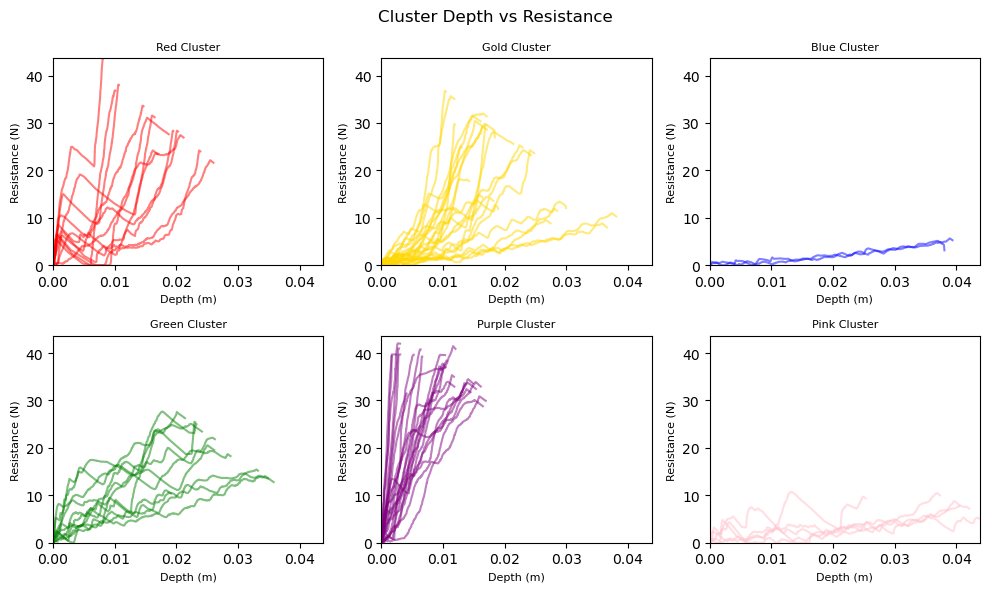

In [4]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[['overall_slope', 'num_peaks', 'largest_force_drop', 'curve_shape']]
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")

# Optimum Feature #2:
- Maximum Depth, Largest Force Drop, Curve Shape

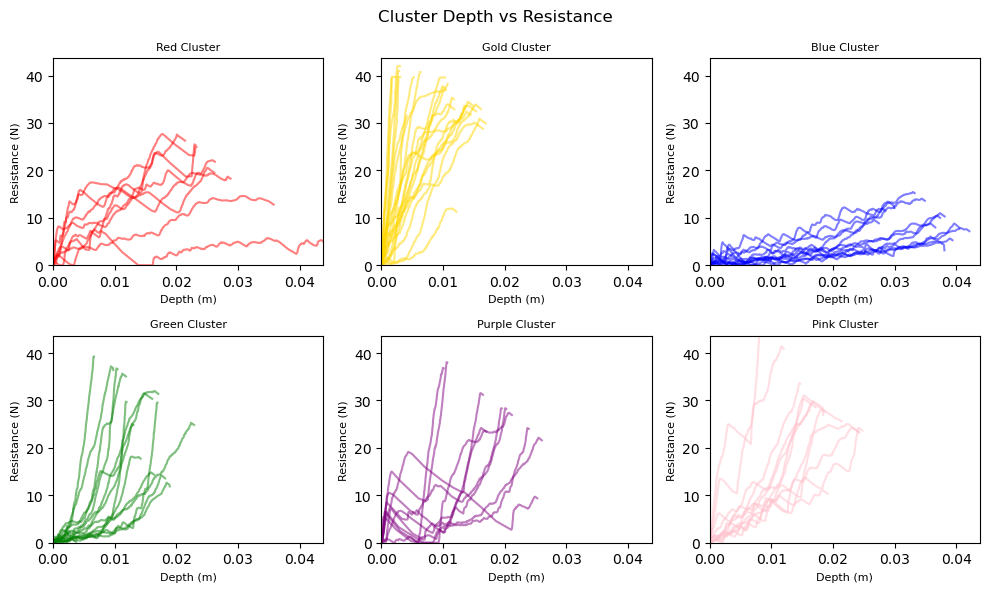

In [5]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[['max_depth', 'largest_force_drop', 'curve_shape']]
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")

# Optimum Feature #3:
- Maximum Resistance, Largest Force Drop, Curve Shape

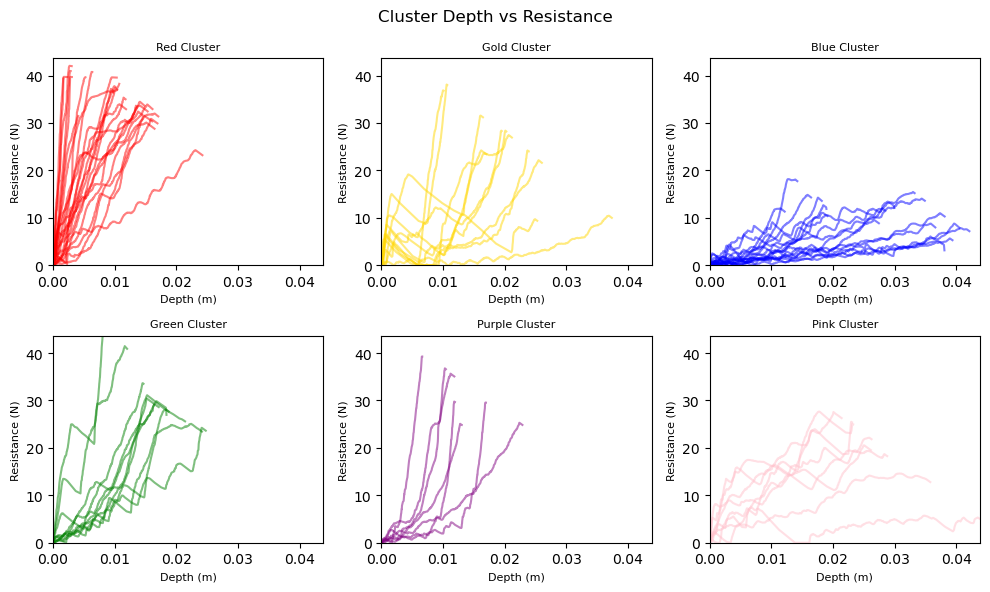

In [6]:
kmeans_elbow = 6
optimum_features_1 = clustering_features_df[['max_resistance', 'largest_force_drop', 'curve_shape']]
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(optimum_features_1)
plotting.plot_clusters_seperately(kmeans.labels_, optimum_features_1.index.tolist(), depth_resist_curve_df_list, data_features_df, "kmeans")
plotting.plot_pca(optimum_features_1, y_labels=kmeans.labels_, num_pc=3, graph_title="kmeans")